In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv("diamonds_new.csv")

In [3]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,Ideal,E,SI2,55.0,3.95,3.98,2.43,163.0
1,0.21,Premium,E,SI1,61.0,3.89,3.84,2.31,163.0
2,0.23,Good,E,VS1,65.0,4.05,4.07,2.31,163.5
3,0.29,Premium,I,VS2,58.0,4.20,4.23,2.63,167.0
4,0.31,Good,J,SI2,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,57.0,5.75,5.76,3.50,1378.5
53936,0.72,Good,D,SI1,55.0,5.69,5.75,3.61,1378.5
53937,0.70,Very Good,D,SI1,60.0,5.66,5.68,3.56,1378.5
53938,0.86,Premium,H,SI2,58.0,6.15,6.12,3.74,1378.5


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53841 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53884 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53877 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


In [5]:
data.describe()

,carat,table,x,y,z,price_new
count,53841.000000,53877.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.798120,57.457719,5.731157,5.734526,3.539635,1966.399861
std,0.474428,2.235742,1.121761,1.142135,0.703869,1994.719869
min,0.200000,43.000000,0.000000,0.000000,0.000000,163.000000
25%,0.400000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,5.010000,95.000000,10.740000,58.900000,31.800000,9411.500000


In [6]:
data.shape

(53940, 9)

In [7]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

# Handle the Missing values


In [8]:
data.isna().sum()

carat        99
cut           0
color        56
clarity       0
table        63
x             0
y             0
z             0
price_new     0
dtype: int64

In [9]:
data.dtypes

carat        float64
cut           object
color         object
clarity       object
table        float64
x            float64
y            float64
z            float64
price_new    float64
dtype: object

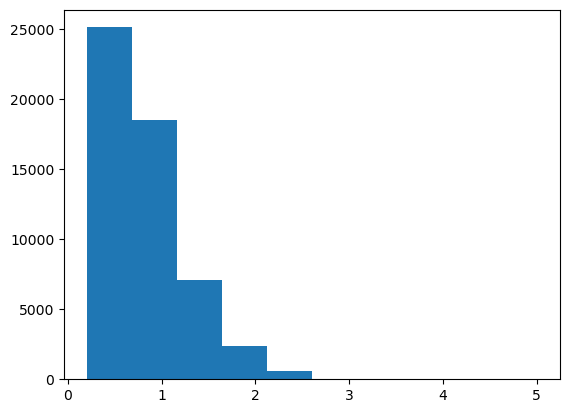

In [10]:
#Filling missing values in column carat.
plt.hist(data['carat'])
plt.show()

In [11]:
median_rate = data['carat'].median()
data['carat'] = data['carat'].fillna(median_rate)

In [12]:
##Filling missing values in column table.
median_rate = data['table'].median()
data['table'] = data['table'].fillna(median_rate)

In [13]:
#Filling missing values in column table. color.
data['color']=data['color'].fillna(data['color'].value_counts().index[0])

In [14]:
data.isnull().sum()

carat        0
cut          0
color        0
clarity      0
table        0
x            0
y            0
z            0
price_new    0
dtype: int64

# Outlier Detection 

# Column "carat"

<Axes: >

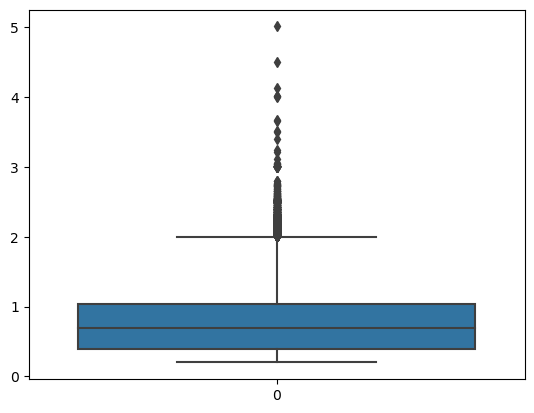

In [15]:
sns.boxplot(data['carat'])

<Axes: >

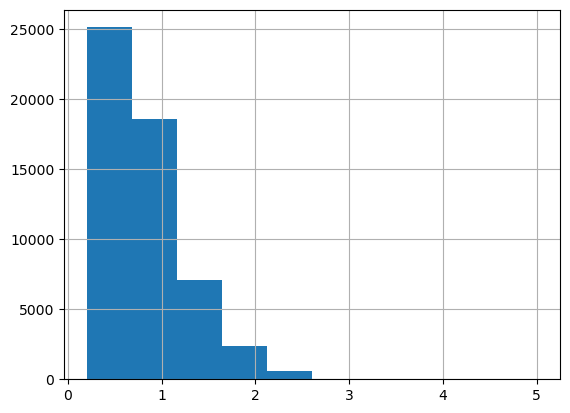

In [16]:
data['carat'].hist()

In [17]:
print('skewness value of carat: ',data['carat'].skew())

skewness value of carat:  1.116645920812613


In [18]:
#interquartile range value of the ‘carat’ variable.
Q1=data['carat'].quantile(0.25)
Q2=data['carat'].quantile(0.75)
IQR=Q2-Q1
IQR

0.64

In [19]:
#Flooring And Capping
Q1 = data['carat'].quantile(0.25)
Q3 = data['carat'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['carat']=np.where(data['carat']>upper_whisker,upper_whisker,np.where(data['carat']<lower_whisker,lower_whisker,data['carat']))

<Axes: >

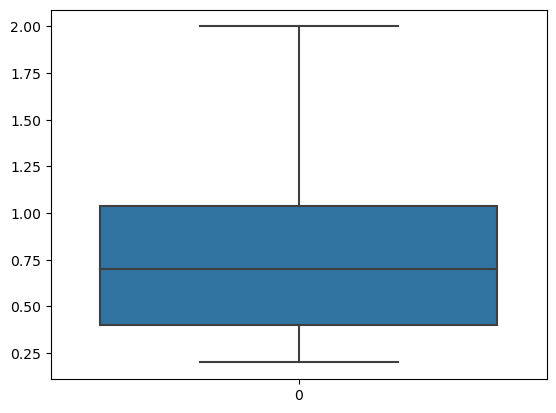

In [20]:
sns.boxplot(data['carat'])

# column 'table'

<Axes: >

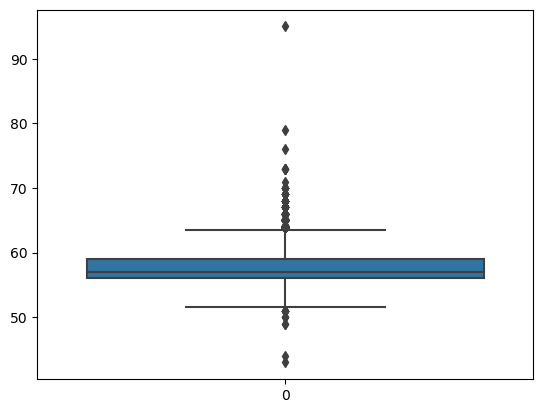

In [21]:
sns.boxplot(data['table'])

<Axes: >

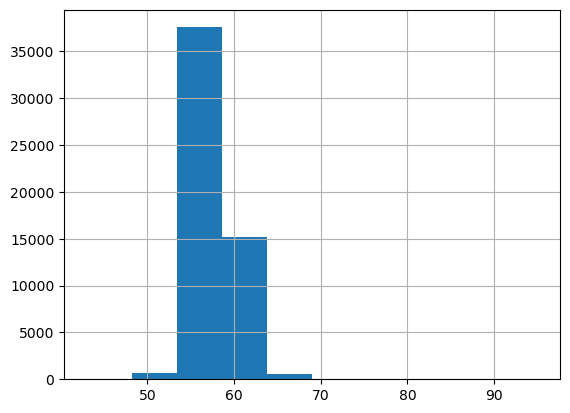

In [22]:
data['table'].hist()

In [23]:
print('skewness value of table: ',data['table'].skew())

skewness value of table:  0.7968958486695427


In [24]:
#interquartile range value of the ‘table’ variable.
Q1=data['table'].quantile(0.25)
Q2=data['table'].quantile(0.75)
IQR=Q2-Q1
IQR

3.0

In [25]:
#Flooring And Capping
Q1 = data['table'].quantile(0.25)
Q3 = data['table'].quantile(0.75)
IQR = Q3 - Q1
whisker_width = 1.5
lower_whisker = Q1 -(whisker_width*IQR)
upper_whisker = Q3 + (whisker_width*IQR)
data['table']=np.where(data['table']>upper_whisker,upper_whisker,np.where(data['table']<lower_whisker,lower_whisker,data['table']))

<Axes: >

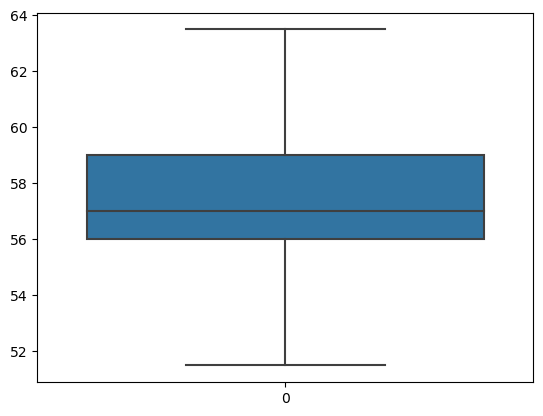

In [26]:
sns.boxplot(data['table'])

# for columns x,y,z

<Axes: >

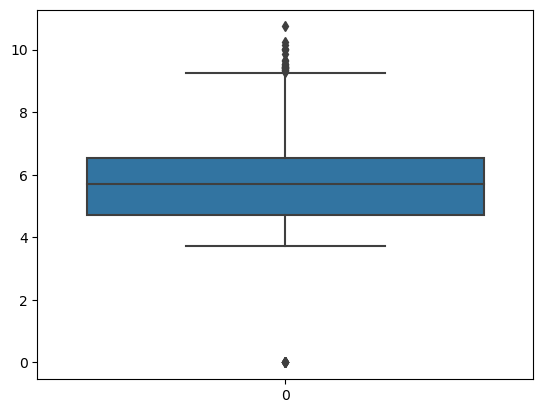

In [29]:

sns.boxplot(data["x"])

<Axes: >

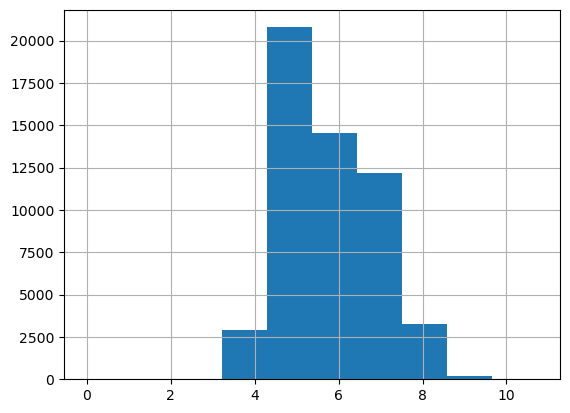

In [34]:
data['x'].hist()

<Axes: >

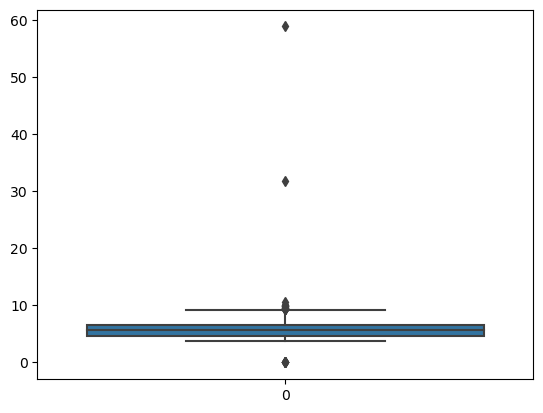

In [30]:
sns.boxplot(data["y"])


<Axes: >

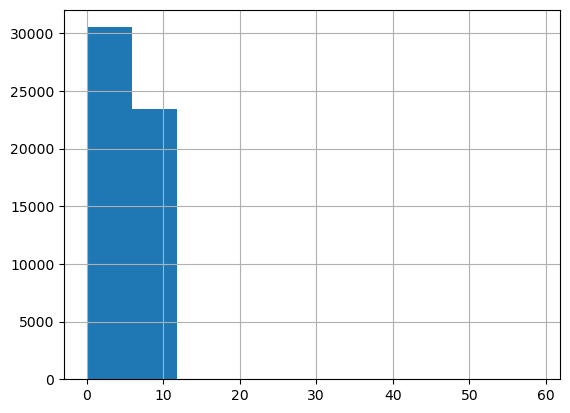

In [35]:
data['y'].hist()

<Axes: >

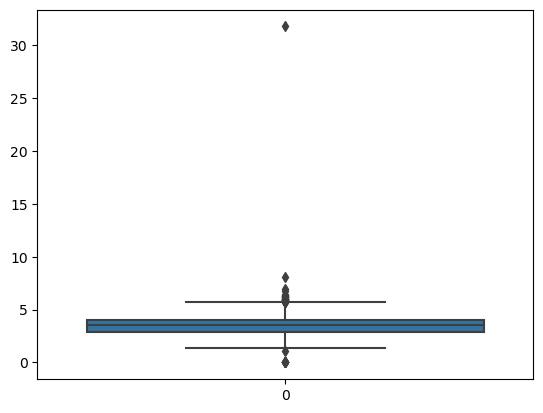

In [32]:
sns.boxplot(data["z"])

<Axes: >

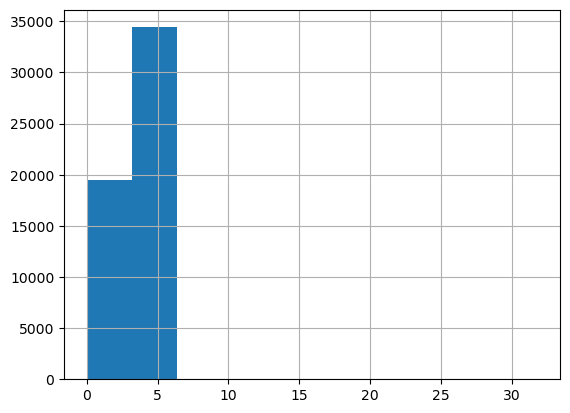

In [36]:
data['z'].hist()

In [38]:
print('skewness value of x: ',data['x'].skew())
print('skewness value of y: ',data['y'].skew())
print('skewness value of z: ',data['z'].skew())

skewness value of x:  0.3786763426463927
skewness value of y:  2.4341667164885554
skewness value of z:  1.5591162616953969


In [43]:
#interquartile range value of the x y and z variable.
columns=['x','y','z']
for column in columns:
    Q1=data[column].quantile(0.25)
    Q2=data[column].quantile(0.75)
    IQR=Q2-Q1
    print("IQR of ",column,"is ",IQR)

IQR of  x is  1.83
IQR of  y is  1.8200000000000003
IQR of  z is  1.13


In [44]:
#Flooring And Capping
columns=['x','y','z']
for column in columns:
    Q1 = data[column].quantile(0.25)
    Q3 = data[column].quantile(0.75)
    IQR = Q3 - Q1
    whisker_width = 1.5
    lower_whisker = Q1 -(whisker_width*IQR)
    upper_whisker = Q3 + (whisker_width*IQR)
    data[column]=np.where(data[column]>upper_whisker,upper_whisker,np.where(data[column]<lower_whisker,lower_whisker,data[column]))

<Axes: >

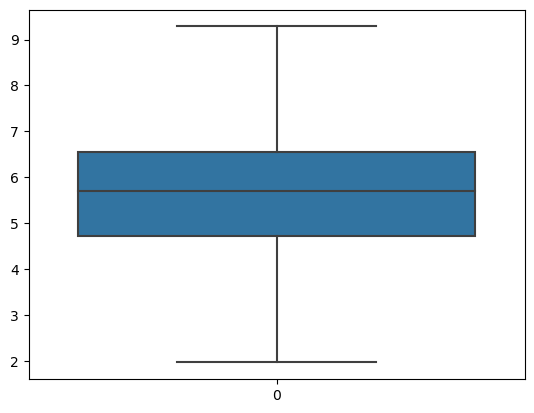

In [45]:
sns.boxplot(data["x"])

<Axes: >

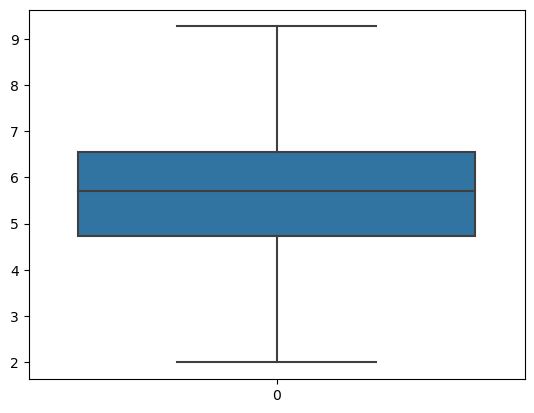

In [47]:
sns.boxplot(data["y"])

<Axes: >

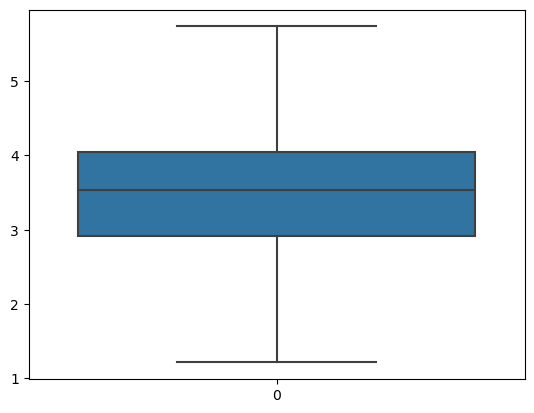

In [48]:
sns.boxplot(data["z"])

# Encoding

In [49]:
data.columns

Index(['carat', 'cut', 'color', 'clarity', 'table', 'x', 'y', 'z',
       'price_new'],
      dtype='object')

In [52]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   carat      53940 non-null  float64
 1   cut        53940 non-null  object 
 2   color      53940 non-null  object 
 3   clarity    53940 non-null  object 
 4   table      53940 non-null  float64
 5   x          53940 non-null  float64
 6   y          53940 non-null  float64
 7   z          53940 non-null  float64
 8   price_new  53940 non-null  float64
dtypes: float64(6), object(3)
memory usage: 3.7+ MB


Encoding for columns cut color and clarity

In [53]:
data['cut'].value_counts()

Ideal        21551
Premium      13791
Very Good    12082
Good          4906
Fair          1610
Name: cut, dtype: int64

In [54]:
data['color'].value_counts()

G    11292
E     9797
F     9542
H     8304
D     6775
I     5422
J     2808
Name: color, dtype: int64

In [55]:
data['clarity'].value_counts()

SI1     13065
VS2     12258
SI2      9194
VS1      8171
VVS2     5066
VVS1     3655
IF       1790
I1        741
Name: clarity, dtype: int64

In [56]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
colomns=['cut','color','clarity']
for column in colomns:
    data[column]=le.fit_transform(data[column])

In [57]:
data

,carat,cut,color,clarity,table,x,y,z,price_new
0,0.23,2,1,3,55.0,3.95,3.98,2.43,163.0
1,0.21,3,1,2,61.0,3.89,3.84,2.31,163.0
2,0.23,1,1,4,63.5,4.05,4.07,2.31,163.5
3,0.29,3,5,5,58.0,4.20,4.23,2.63,167.0
4,0.31,1,6,3,58.0,4.34,4.35,2.75,167.5
...,...,...,...,...,...,...,...,...,...
53935,0.72,2,0,2,57.0,5.75,5.76,3.50,1378.5
53936,0.72,1,0,2,55.0,5.69,5.75,3.61,1378.5
53937,0.70,4,0,2,60.0,5.66,5.68,3.56,1378.5
53938,0.86,3,4,3,58.0,6.15,6.12,3.74,1378.5


In [61]:
data.describe()

,carat,cut,color,clarity,table,x,y,z,price_new
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.792558,2.553003,2.594197,3.835150,57.438561,5.731285,5.733311,3.539131,1966.399861
std,0.457089,1.027708,1.701105,1.724591,2.161139,1.119956,1.111950,0.691776,1994.719869
min,0.200000,0.000000,0.000000,0.000000,51.500000,1.965000,1.990000,1.215000,163.000000
25%,0.400000,2.000000,1.000000,2.000000,56.000000,4.710000,4.720000,2.910000,475.000000
50%,0.700000,2.000000,3.000000,4.000000,57.000000,5.700000,5.710000,3.530000,1200.500000
75%,1.040000,3.000000,4.000000,5.000000,59.000000,6.540000,6.540000,4.040000,2662.125000
max,2.000000,4.000000,6.000000,7.000000,63.500000,9.285000,9.270000,5.735000,9411.500000


# Scaling

In [62]:
#importing the MinMaxScaler
from sklearn.preprocessing import MinMaxScaler
# Create a MinMaxScaler object
scaler = MinMaxScaler()

In [64]:
scaled = scaler.fit_transform(data)
print(scaled)

[[1.66666667e-02 5.00000000e-01 1.66666667e-01 ... 2.73351648e-01
  2.68805310e-01 0.00000000e+00]
 [5.55555556e-03 7.50000000e-01 1.66666667e-01 ... 2.54120879e-01
  2.42256637e-01 0.00000000e+00]
 [1.66666667e-02 2.50000000e-01 1.66666667e-01 ... 2.85714286e-01
  2.42256637e-01 5.40628210e-05]
 ...
 [2.77777778e-01 1.00000000e+00 0.00000000e+00 ... 5.06868132e-01
  5.18805310e-01 1.31426718e-01]
 [3.66666667e-01 7.50000000e-01 6.66666667e-01 ... 5.67307692e-01
  5.58628319e-01 1.31426718e-01]
 [3.05555556e-01 5.00000000e-01 0.00000000e+00 ... 5.32967033e-01
  5.36504425e-01 1.31426718e-01]]


In [65]:
data_new = pd.DataFrame(scaled)
data_new.head()

,0,1,2,3,4,5,6,7,8
0,0.016667,0.50,0.166667,0.428571,0.291667,0.271175,0.273352,0.268805,0.000000
1,0.005556,0.75,0.166667,0.285714,0.791667,0.262978,0.254121,0.242257,0.000000
2,0.016667,0.25,0.166667,0.571429,1.000000,0.284836,0.285714,0.242257,0.000054
3,0.050000,0.75,0.833333,0.714286,0.541667,0.305328,0.307692,0.313053,0.000433
4,0.061111,0.25,1.000000,0.428571,0.541667,0.324454,0.324176,0.339602,0.000487


In [66]:
data_new.describe()

,0,1,2,3,4,5,6,7,8
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.329199,0.638251,0.432366,0.547879,0.494880,0.514520,0.514191,0.514188,0.194994
std,0.253938,0.256927,0.283517,0.246370,0.180095,0.152999,0.152740,0.153048,0.215680
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.111111,0.500000,0.166667,0.285714,0.375000,0.375000,0.375000,0.375000,0.033735
50%,0.277778,0.500000,0.500000,0.571429,0.458333,0.510246,0.510989,0.512168,0.112180
75%,0.466667,0.750000,0.666667,0.714286,0.625000,0.625000,0.625000,0.625000,0.270219
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
